# Atividade IA - Regras de Associação

 * Tarefa sobre regras de associação utilizando dataset do supermercado dotto

# Importando as bibliotecas 

In [8]:
import unidecode
import numpy as np
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (17,9) # Bigger figures sizes

# Funções de auxilío 

In [9]:
def norm(string):
    """Normalizes pt-br string

    Arguments:
        string {str} -- a portuguese type string (ex: não, é muito pouco...)

    Returns:
        str -- a normalized string (ex: nao, e muito pouco)
    """
    if(isinstance(string, list)):
        string = " ".join(string)

    s = unidecode.unidecode(string)
    s = s.lower().strip()
    return s

# Pré-processamento de dados

* Arquivo: dotto.data
* Lendo como csv separado por espaço

In [10]:
# Descobrindo a maior compra
max_items = -1

with open('dotto.data', mode='r+', encoding='ISO-8859-1') as file:
    for line in file:
        line = norm(line)
        # Quebrando em lista
        length_line = len(line.split(' '))
        
        if length_line > max_items:
            max_items = length_line

# max_items tem a maior compra agora
print('Maior compra %d' % max_items)

Maior compra 170


In [11]:
# Lendo como um pd.DataFrame, enconding não é utf-8 por algum motivo.
data = pd.read_csv('dotto.data', delim_whitespace=True, header=None, names=range(max_items), encoding='ISO-8859-1')
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,AGUA_SANITCANDURA,CERA_BRAVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACUCAR_DA_BARRA,AGUA_SANITVAREK,ALCOOL_CANDURA,ARROZ_PRATO_FINO,AZEITE_CARBONELL,BISCSAO_CARLOS,BOMBOM_LACTA,CAFE_SERRA_DA_GRAMA,CALDO_KNORR,CHEIRO_VERDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGUA_SANITVAREK,CAPELETTI_MEZZANI,FILE_PEITO_FRANGO_SADIA,HARPIC_LIQATIVO,LEITE_NILZA,LEITE_PARMALAT,MARGBECEL,PAPEL_HIGPERSONAL,PIMENTA_COMARI_CEPERA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACUCAR_UNIAO,CAFE_CABOCLO,FANTA,LEITE_MOCA,LEITE_PARMALAT,MANTEIGA_BATAVO,REQNILZA,SPRITE,ZIPLOC_POTE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADES_ORIGINAL,LEITE_PARMALAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABSINTGEL,ACHOCNESCAU,ACUCAR_UNIAO,ADES_LIGHT_MACA_ALIMLIQDE_SOJA,AGUA_SANITVAREK,AJAX_BOUQUET_FLORES_DO_SOL,ALFACE_MIMOSA_BIO_TERRA,ALHO_DA_ROCA,AMACCANDURA,ARROZ_ALBARUSKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ADES_MACA_ALIMLIQDE_SOJA,ADES_PESSEGO,AGUA_PRATA,AMACCOMFORT,BISCNESTLE,BISNAGUINHA_PANCO,BROCOLIS,CARRETO,DETERGLIMPOL,FILTRO_PAPEL_MELITTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,DESBA_BANHO,SHALL_CLEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AGUA_DE_COCO_SOCOCO,BALAS_RECHMEL_DORI,CHOCNESTLE,CORN_FLAKES_KELLOG_S,LEITE_NILZA,MARGDORIANA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ADES_MACA_ALIMLIQDE_SOJA,BALA_CHITA,BISNAGUINHA_PULLMAN,CREME_DE_LEITE_NESTLE,DETERGYPE,FILE_PEITO_FRANGO_SADIA,FOSFORO_FIAT_LUX,LEITE_MOCA,LUSTRA_MOVPOLIFLOR,MACBARILLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


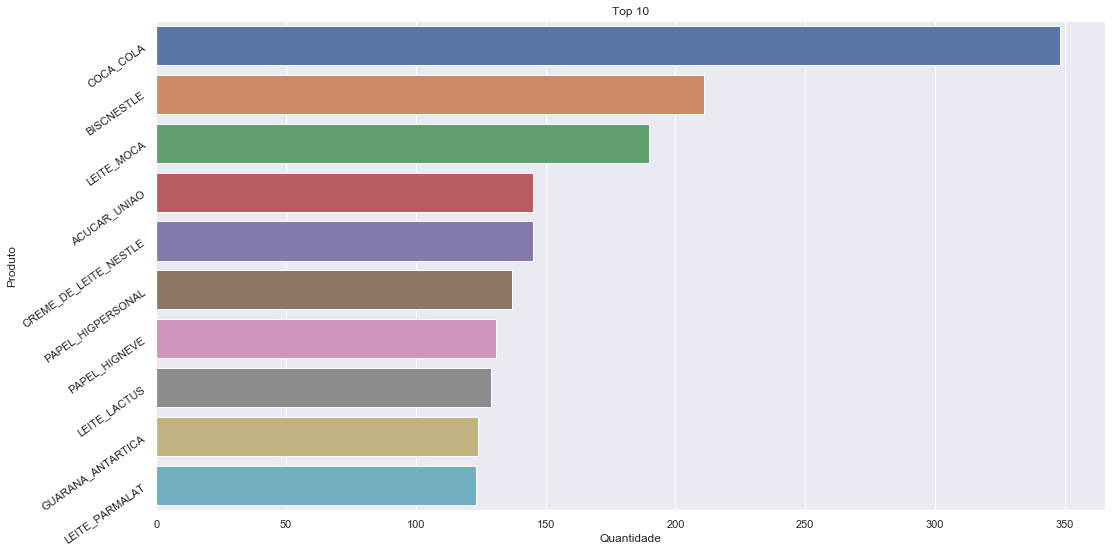

In [12]:
# Vizualizando a distribuição dos produtos
# Transformando em ocorrências
ocorrencias = data.stack().value_counts().reset_index()
# Plotando os 10 mais comprados
top10_plot = sns.barplot(x=ocorrencias.head(10)[0], y=ocorrencias.head(10)['index'])
top10_plot.set(xlabel='Quantidade', ylabel='Produto', title='Top 10')
plt.yticks(rotation=35)
plt.show()

# Modelo Apriori

## Valores minimos para suporte, confiança e lift.
Considerando que o periodo da coleta dos dados seja de uma semana.

### Suporte
O suporte indica a frequência com que um itemset ou com que A e B ocorrem juntos no conjunto de dados
* Pegaremos os produtos que são vendidos pelo menos 4 vezes no dia.
* Então durante uma semana ele sera vendido 4*7 vezes.
* Logo o suporte minimo será (4*7)/Total(1716) = 0.017

### Confiança
A confiança de uma regra A => B é a probabilidade condicional da transação conter o conjunto de itens B, dado que contém o conjunto A.
* Valores altos de confiança geram regras óbvias.
* Valores baixos podem gerar regras erradas para aquele tipo de modelo de negócios.
* Como 1716 ainda não é muito usaremos uma confiança não muito alta nem tão baixa entre 0.3 e 0.4.

### Lift
A medida Lift, também conhecida por Interest, é uma das mais utilizadas para avaliar dependências entre itemsets.
Leva em consideração o peso da popularidade de B também.
* lift(A => B) = 1: A e B são independentes
* lift(A => B) > 1: A e B são positivamente dependentes
* lift(A => B) < 1: A e B são negativamente dependentes
* Intervalo: [0, ∞[
* Simétrica.
* Quanto maior o valor de Lift, mais interessante a regra.
* O valor de minimo de lift será 3 por razões de teste em outras situações.

In [25]:
# apyori biblioteca simples do apriory
from apyori import apriori
transacoes = data.fillna('NaN').values
# Transacoes
regras = apriori(transacoes, min_support = 0.017, min_confidence = 0.45, min_lift = 3)
# Ordenando por lift
regras = sorted(regras, key = lambda x: int(x[2][0][3]), reverse=True)

top5_regras = regras[0:5]

# Analisando as regras obtidas

Regra: BOMBRIL -> CREME_DE_LEITE_NESTLE
Support: 0.017482517482517484
Confiança: 0.9375000000000001
Lift: 8.467105263157896
Regra: LEITE_MOCA -> ACHOCNESCAU
Support: 0.019813519813519812
Confiança: 0.7906976744186045
Lift: 7.141248470012239
Regra: CREME_DE_LEITE_NESTLE -> LEITE_MOCA
Support: 0.023892773892773892
Confiança: 0.7884615384615384
Lift: 7.121052631578947
Regra: FARTRIGO_RENATA -> CREME_DE_LEITE_NESTLE
Support: 0.019813519813519812
Confiança: 0.8499999999999999
Lift: 7.676842105263157
Regra: CREME_DE_LEITE_NESTLE -> PAPEL_HIGPERSONAL
Support: 0.017482517482517484
Confiança: 0.7894736842105264
Lift: 7.130193905817176


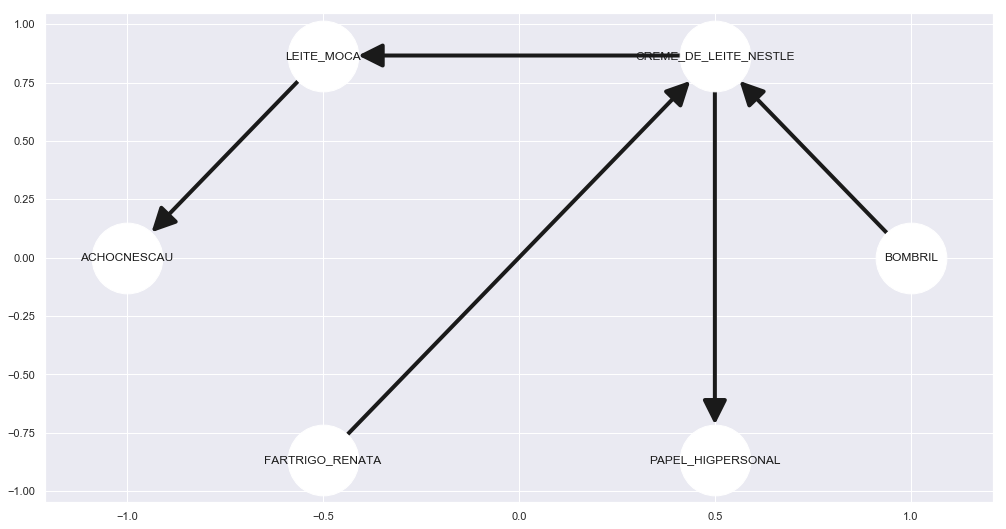

In [27]:
import networkx as nx

options = {
    'node_color': 'white',
    'node_size': 5000,
    'width': 4,
    'arrowstyle': '-|>',
    'arrowsize': 50,
    'fontsize': 16
}

g = nx.DiGraph(directed=True)

nodes = []
for item in top5_regras:
    # Primeiro indice da primeira lista interna
    # Contem o item base e o segundo item
    pair = item[0] 
    items = [x for x in pair]
    nodes.append(items[0])
    nodes.append(items[1])
    
    g.add_nodes_from(nodes)
    g.add_edge(items[0],items[1])
    
    print("Regra: " + items[0] + " -> " + items[1])

    # Segundo indice é o suporte
    print("Support: " + str(item[1]))

    print("Confiança: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")  

pos = nx.circular_layout(g)

nx.draw_networkx(g, pos,**options)
plt.show()

# Conclusão
* Nota-se que algumas regras são realmente validas e até óbvias como LEITE_MOCA + ACHNESCAU = Brigadeiro e outras parecem ser totalmente estranhas BOMBRIL + CREME_DE_LEITE_NESTLE